Question 01 - Intensity Transformation

1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b. 

## Question 1: Intensity Transformation

For Question 1, we implemented an intensity transformation on `emma.jpg`:

- The input image was converted to grayscale.
- A piecewise LUT was constructed as per Fig. 1a:
  - 0-49 → unchanged
  - 50 → jump to 100
  - 51-149 → linear mapping to 255
  - 150 → drop to 150
  - 151-255 → unchanged
- The LUT was applied using OpenCV's `cv2.LUT`.
- Original vs transformed images were displayed side by side.
- The LUT curve was plotted to show the mapping.
- Simple histograms were shown to demonstrate the change in intensity distribution.
- Transformed image saved in `data/output_images/q1_emma_transformed.png`.

This shows how the intensity transformation changes the image contrast and pixel values.


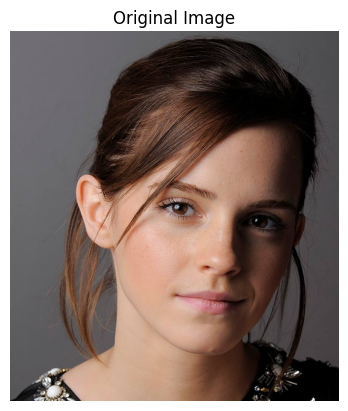

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Correct relative path
img = cv.imread('../data/a1images/emma.jpg')

# Check if it loaded
if img is None:
    raise FileNotFoundError("Image not found! Check the path and branch.")

# Display the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()


In [ ]:
# Question 1: Intensity Transformation on Emma (Grayscale)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os


# Set paths for input/output

# Path to input image
input_image_path = Path("../data/a1images/emma.jpg")

# Path to save transformed images
output_folder = Path("../data/output_images") 
# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)
output_image_path = output_folder / "q1_emma_transformed.png" 

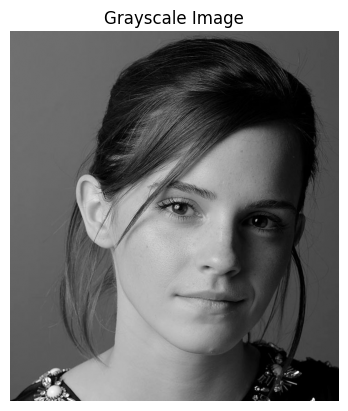

In [ ]:
# Load image and convert to grayscale
img_color = cv.imread(str(input_image_path))
if img_color is None:
    raise FileNotFoundError(f"Could not find image at {input_image_path}")

# Convert to grayscale
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

# Display original grayscale image
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


In [ ]:
# Build LUT for intensity transformation (Example mapping similar to Fig.1a)

lut = np.zeros(256, dtype=np.uint8)

# 0..49 -> output = input
lut[0:50] = np.arange(0, 50, dtype=np.uint8)

# Jump at 50 -> output = 100
lut[50] = 100

# 51..149 -> linear mapping (50,100) -> (150,255)
x = np.arange(51, 150)
lut[51:150] = np.clip(np.rint(100 + (x-50) * ((255-100)/(149-51))), 0, 255).astype(np.uint8)

# Drop at 150 -> output = 150
lut[150] = 150

# 151..255 -> output = input
lut[151:256] = np.arange(151, 256, dtype=np.uint8)


In [ ]:
# Apply LUT to the image
img_transformed = cv.LUT(img_gray, lut)

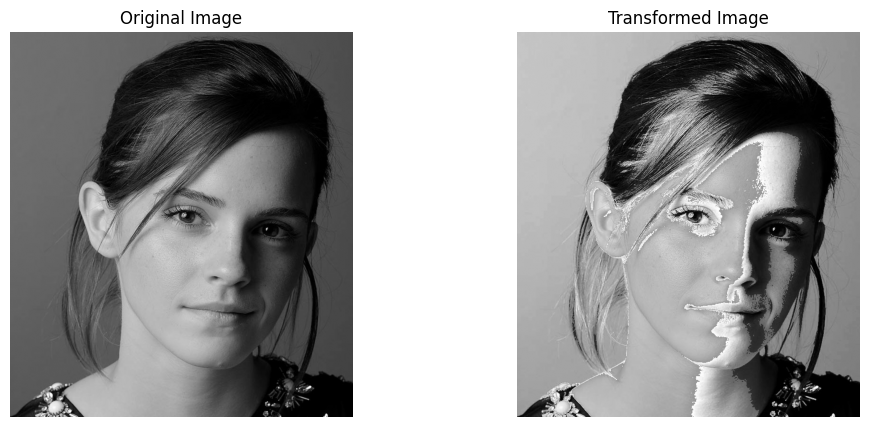

In [ ]:
# Display Original vs Transformed Images

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(img_transformed, cmap='gray')
axs[1].set_title("Transformed Image")
axs[1].axis('off')

plt.show()


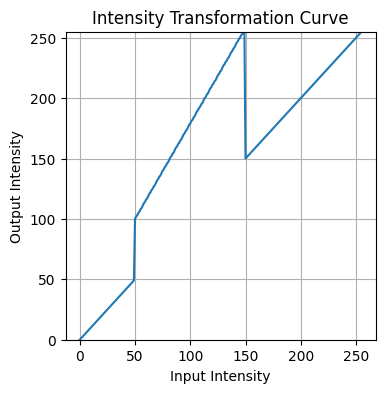

In [ ]:
# Display the LUT / Transformation Curve

plt.figure(figsize=(4,4))
plt.plot(lut)
plt.title("Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.ylim([0, 255])
plt.grid(True)
plt.show()


In [ ]:
# Save the transformed image in the output folder

cv.imwrite(str(output_image_path), img_transformed)
print("Transformed image saved at:", output_image_path)


Transformed image saved at: ..\data\output_images\q1_emma_transformed.png
